<a href="https://colab.research.google.com/github/pankajsingh09/Hands-on-Big-Data-Practices-with-PySpark-Spark-Tuning/blob/main/Working_with_DataFrames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Working with DF (DataFrame)**

**`Udemy Course: Best Hands-on Big Data Practices and Use Cases using PySpark`**

**`Author: Amin Karami (PhD, FHEA)`**

---

**DataFrame (DF)**: Schema (named columns) + declarative language. A DataFrame is a Dataset organized into named columns. It is conceptually equivalent to a table in a relational database. DataFrames can be constructed from a wide array of sources such as: structured data files, tables in Hive, external databases, or existing RDDs. It is very efficient for strucutred data.

source: https://spark.apache.org/docs/latest/sql-programming-guide.html

source: https://spark.apache.org/docs/latest/api/python/reference/

In [1]:
########## ONLY in Colab ##########
!pip3 install pyspark
########## ONLY in Colab ##########

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 36 kB/s 
     |████████████████████████████████| 199 kB 53.9 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=281ac354ec96d9d8041771721f280a1353390794378346c54c63cc6cc7f4bc2a
  Stored in directory: /root/.cache/pip/wheels/42/59/f5/79a5bf931714dcd201b26025347785f087370a10a3329a899c
Successfully built pyspark


In [2]:
########## ONLY in Ubuntu Machine ##########
# Load Spark engine
!pip3 install -q findspark
import findspark
findspark.init()
########## ONLY in Ubuntu Machine ##########

In [3]:
# Linking with Spark (https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql.html)
import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()
spark

# **Part 1: Create DF and Basic Operations**

In [5]:
# Create/Load DF: (Spark automatically scans through the files and infers the schema of the dataset)
# data source: https://www.kaggle.com/thec03u5/fifa-18-demo-player-dataset
data = spark.read.format('csv').load("CompleteDataset.csv", inferSchema = True, header = True)

In [6]:
# Show data:
data.show()

+---+-----------------+---+--------------------+-----------+--------------------+-------+---------+-------------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|_c0|             Name|Age|               Photo|Nationality|                Flag|Overall|Potential|               Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handling|

In [7]:
# How many partitions in DF?
data.rdd.getNumPartitions()

2

In [8]:
# Increase/Desrease the partitions in DF
data2= data.repartition(4)
data2.rdd.getNumPartitions()

4

In [9]:
# Show DF
data2.show()

+-----+-------------+---+--------------------+-------------+--------------------+-------+---------+--------------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|  _c0|         Name|Age|               Photo|  Nationality|                Flag|Overall|Potential|                Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handlin

In [10]:
# Rename Columns and Amend NULLs:
data2 = data2.withColumnRenamed("_c0","ID") \
.withColumnRenamed("Ball control", "Ball_Control") \
.withColumnRenamed("Sliding tackle", "Sliding_Tackle")

data2.na.fill({"RAM":10, "RB":1}).show()

+-----+-------------+---+--------------------+-------------+--------------------+-------+---------+--------------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|   ID|         Name|Age|               Photo|  Nationality|                Flag|Overall|Potential|                Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball_Control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handlin

In [12]:
# Transformation (SELECT):
data2.select("Name","Overall").distinct().show()

+------------------+-------+
|              Name|Overall|
+------------------+-------+
|        E. Horvath|     71|
|        M. Randall|     62|
|      A. Granqvist|     80|
|       A. Thompson|     65|
|    R. Cornthwaite|     66|
|         G. Zajkov|     62|
|       J. Cuadrado|     82|
|           M. Dube|     63|
|      A. Al Asmari|     62|
|           T. Aoki|     64|
|        M. Edwards|     58|
|           L. Amos|     60|
|       S. Kawamata|     56|
|A. Taylor-Sinclair|     60|
|       A. Bouchard|     60|
|        J. Cortizo|     58|
|     Fran Villalba|     70|
|         V. Lazaro|     71|
|         Guillermo|     70|
|         T. Ayasse|     68|
+------------------+-------+
only showing top 20 rows



In [14]:
# Transformation (FILTER):
data2.filter(data2["Overall"] > 80).show()

+---+-------------+---+--------------------+-----------+--------------------+-------+---------+--------------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
| ID|         Name|Age|               Photo|Nationality|                Flag|Overall|Potential|                Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball_Control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handling|GK kic

In [15]:
# Transformation (FILTER):
data2.select("Name","Age","Overall").filter(data["Overall"]>80).show()

+---------------+---+-------+
|           Name|Age|Overall|
+---------------+---+-------+
|      M. Škrtel| 32|     81|
|    L. Goretzka| 22|     82|
|      De Marcos| 28|     81|
|   Rui Patrício| 29|     83|
|       Giuliano| 27|     81|
|       R. Bürki| 26|     84|
|           Saúl| 22|     82|
|   C. Marchisio| 31|     85|
|    David Villa| 35|     82|
|       M. Perin| 24|     83|
|  W. Ben Yedder| 26|     81|
|   J. Henderson| 27|     82|
|      O. Toprak| 27|     83|
|     S. N'Zonzi| 28|     83|
|    R. Fährmann| 28|     84|
|        M. Rojo| 27|     82|
|  João Moutinho| 30|     82|
|         Iborra| 29|     82|
|  Gabriel Jesus| 20|     81|
|Mário Fernandes| 26|     81|
+---------------+---+-------+
only showing top 20 rows



In [19]:
 # Transformation (FILTER):
data2.where(data2["Overall"]>80).groupBy("Age").count().sort("Age").show()

+---+-----+
|Age|count|
+---+-----+
| 18|    2|
| 20|    3|
| 21|   11|
| 22|   16|
| 23|   23|
| 24|   27|
| 25|   34|
| 26|   39|
| 27|   39|
| 28|   43|
| 29|   35|
| 30|   39|
| 31|   26|
| 32|   21|
| 33|   15|
| 34|    8|
| 35|    6|
| 36|    4|
| 39|    1|
+---+-----+



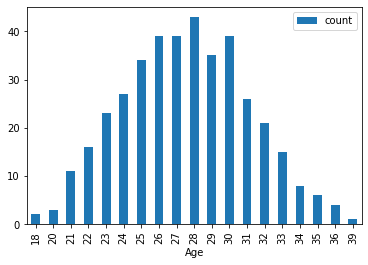

In [21]:
# Visualize the results:
data2_result = data2.where(data2["Overall"]>80).groupBy("Age").count().sort("Age")
pandas_df = data2_result.toPandas()

pandas_df.plot(x= "Age", y="count",kind ="bar")

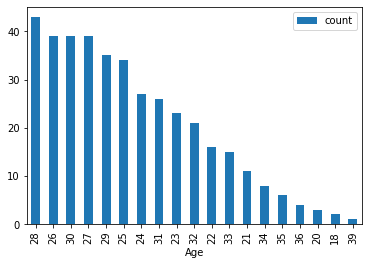

In [22]:
pandas_df.sort_values(by = "count", ascending=False).plot(x= "Age", y="count",kind ="bar")

# **Part 2: Advanced DF Operations: Spark SQL and UDF**

In [23]:
# Spark SQL (Register the DF using a local temporary view):
data2.createOrReplaceTempView("football")



In [24]:
# SQL Query:

sql_query = """SELECT Age, count(*) as Count
                FROM football 
                WHERE Overall > 80
                GROUP BY Age
                ORDER BY Age"""

result = spark.sql(sql_query)
result.show()

+---+-----+
|Age|Count|
+---+-----+
| 18|    2|
| 20|    3|
| 21|   11|
| 22|   16|
| 23|   23|
| 24|   27|
| 25|   34|
| 26|   39|
| 27|   39|
| 28|   43|
| 29|   35|
| 30|   39|
| 31|   26|
| 32|   21|
| 33|   15|
| 34|    8|
| 35|    6|
| 36|    4|
| 39|    1|
+---+-----+



In [27]:
# UDF (User Defined Functions):

def Upper(record):
  if record is not None:
    if len(record)>10:
      return record.upper()
    else:
      return record.lower()

# register the DF
data2.createOrReplaceTempView("football")

# register the function
spark.udf.register("UPPER", Upper)

# Use the UDF in SQL

query = "SELECT Age, UPPER(Name) as Name , UPPER(Club) as Club from football "
result = spark.sql(query)
result.show()



+---+-----------------+--------------------+
|Age|             Name|                Club|
+---+-----------------+--------------------+
| 26|         v. moren|    WAASLAND-BEVEREN|
| 33|        c. agoste|UNIVERSIDAD CATÓLICA|
| 19|    STEVEN PRIETO|         REAL OVIEDO|
| 21|        c. alemán|ESTUDIANTES DE LA...|
| 27|       p. wiegers|   SG DYNAMO DRESDEN|
| 26|     H. YAMAGUCHI|        CEREZO OSAKA|
| 29|    D. MCGOLDRICK|        IPSWICH TOWN|
| 24|       r. teibert|VANCOUVER WHITECA...|
| 20|          i. radu|            avellino|
| 28|   P. ABRAHAMSSON|           bk häcken|
| 21|       c. burgess|   SCUNTHORPE UNITED|
| 31|            galán|      RAYO VALLECANO|
| 25|       r. andrero|      AUDAX ITALIANO|
| 31|         m. topal|       FENERBAHÇE SK|
| 23|        l. moneta|      LEGIA WARSZAWA|
| 21|        t. szántó|       SK RAPID WIEN|
| 23|          y. njie|         BOAVISTA FC|
| 20|     AARÓN MARTÍN|        RCD ESPANYOL|
| 23|K. FRIESENBICHLER|     FK AUSTRIA WIEN|
| 20|     